<h1><mark>Import needed libraries</mark></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split  
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline  
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as st
from itertools import permutations


<h1><mark>Read data set</mark></h1>

In [2]:
df = pd.read_csv('insurance.csv')

### ***Simple linear regression before cleaning (age and charge)***

### ***Simple linear regression before cleaning & accuracy = 8.9%***

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 10 May 2024   Prob (F-statistic):           4.89e-29
Time:                        20:19:30   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

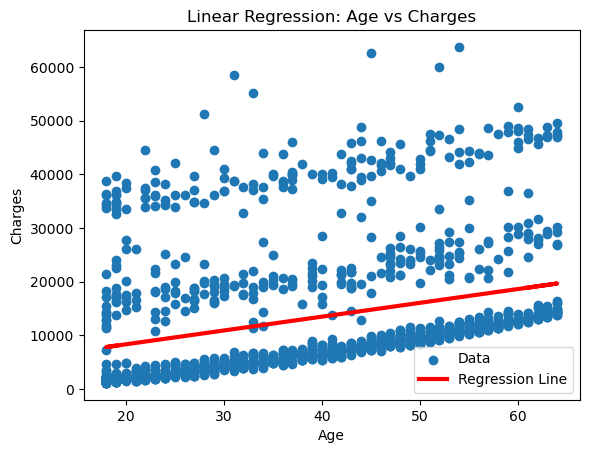

In [3]:
x=df['age']
y=df['charges']

# Add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print model summary
print(model.summary())

# Plot data and regression line
plt.scatter(df['age'], df['charges'], label='Data')
plt.plot(df['age'], model.predict(), color='red', label='Regression Line', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges')
plt.legend()
plt.show()

<h1><mark>Some exploration of the data</mark></h1>

In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h1><mark>Data cleaning and Data Preprocessing</mark></h1>

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates()

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

<hr></hr>

<h1><mark>Clean outliers</mark></h1>

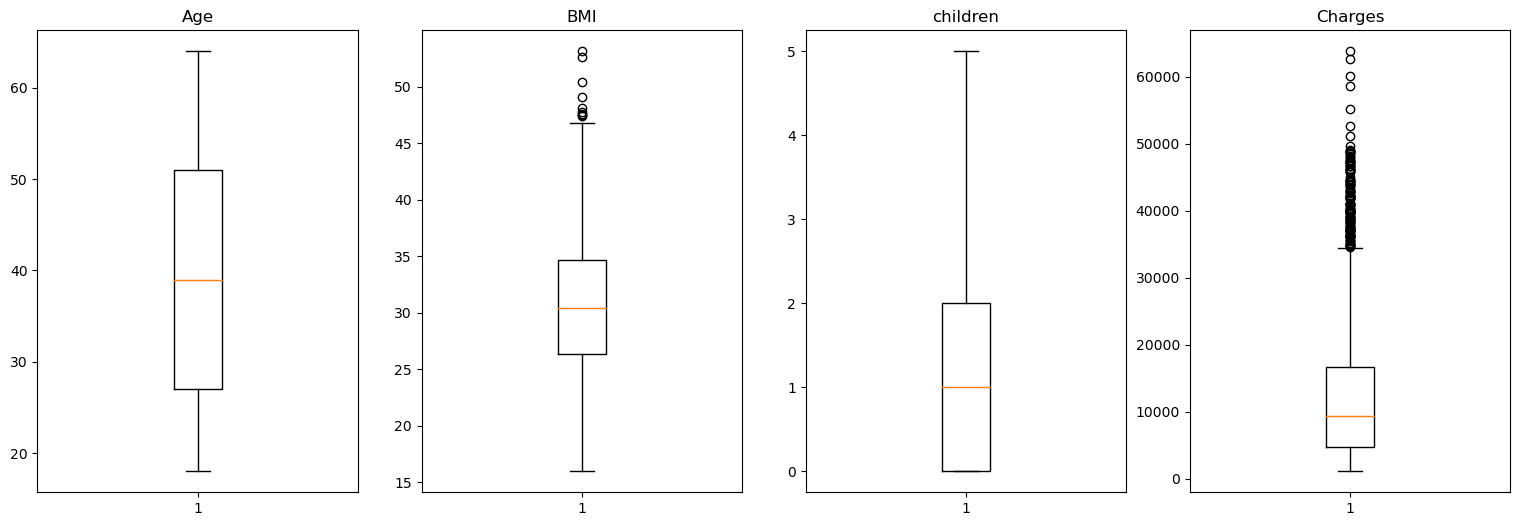

In [11]:
plt.figure(figsize=(19, 6))
plt.subplot(1, 4, 1)
plt.boxplot(df['age'])
plt.title('Age')

plt.subplot(1, 4, 2)
plt.boxplot(df['bmi'])
plt.title('BMI')

plt.subplot(1, 4, 3)
plt.boxplot(df['children'])
plt.title('children')

plt.subplot(1, 4, 4)
plt.boxplot(df['charges'])
plt.title('Charges')

plt.show()

In [12]:
df_filtered = df[(df['bmi'] <= 45)]
df_filtered = df_filtered[(df['charges'] <= 15000)]

C:\Users\abdelrhman\AppData\Local\Temp\ipykernel_16652\282266457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['charges'] <= 15000)]


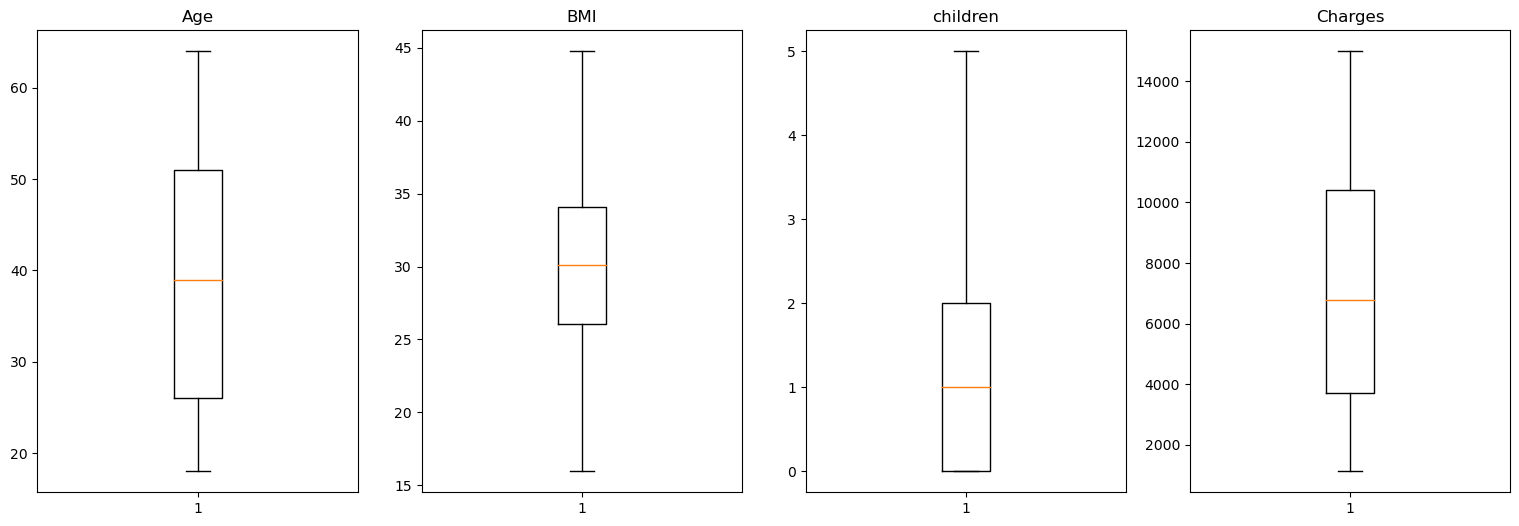

In [13]:
plt.figure(figsize=(19, 6))
plt.subplot(1, 4, 1)
plt.boxplot(df_filtered['age'])
plt.title('Age')

plt.subplot(1, 4, 2)
plt.boxplot(df_filtered['bmi'])
plt.title('BMI')

plt.subplot(1, 4, 3)
plt.boxplot(df_filtered['children'])
plt.title('children')

plt.subplot(1, 4, 4)
plt.boxplot(df_filtered['charges'])
plt.title('Charges')

plt.show()

In [14]:
# Percentage of removed rows (outliers)
((len(df) - len(df_filtered)) / len(df)) * 100

27.877428998505234

In [15]:
df_filtered

age     sex    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
...   ...     ...    ...       ...    ...        ...         ...
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450

[965 rows x 7 columns]

<hr></hr>

<h1><mark>Visualize each feature in the data</mark></h1>

In [16]:
def create_boxplot(dataframe, column, title=None, xlabel=None, ylabel=None, color='blue'):
    plt.figure(figsize=(8, 5))
    plt.boxplot(dataframe[column], patch_artist=True, boxprops=dict(facecolor=color))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def create_barplot_single(dataframe, column, title=None, xlabel=None, ylabel=None, color='blue'):
    fig = go.Figure(go.Bar(x=dataframe[column].value_counts().index,
                           y=dataframe[column].value_counts().values,
                           marker_color=color))
    fig.update_layout(title=title, xaxis_title=xlabel, yaxis_title=ylabel)
    fig.show()

def create_piechart(dataframe, column, title=None, colors=None):
    if colors is None:
        colors = px.colors.qualitative.Plotly
    
    fig = px.pie(dataframe, names=dataframe[column].value_counts().index, 
                 values=dataframe[column].value_counts().values, 
                 title=title,
                 color_discrete_sequence=colors)
    fig.show()

def create_violinplot_single(dataframe, column, title=None, xlabel=None, ylabel=None, color='blue'):
    fig = px.violin(dataframe, y=column, title=title, violinmode='overlay')
    fig.update_traces(marker_color=color, selector=dict(type='violin'))
    fig.update_layout(xaxis_title=xlabel, yaxis_title=ylabel)
    fig.show()

def create_histogram(dataframe, column, title=None, xlabel=None, ylabel=None, color=None):
    if color is None:
        color = 'lightblue'  
    fig = px.histogram(dataframe, x=column, title=title,
                       labels={column: xlabel, 'count': ylabel},
                       color_discrete_sequence=[color])
    fig.update_layout(width=800, height=500)
    fig.show()


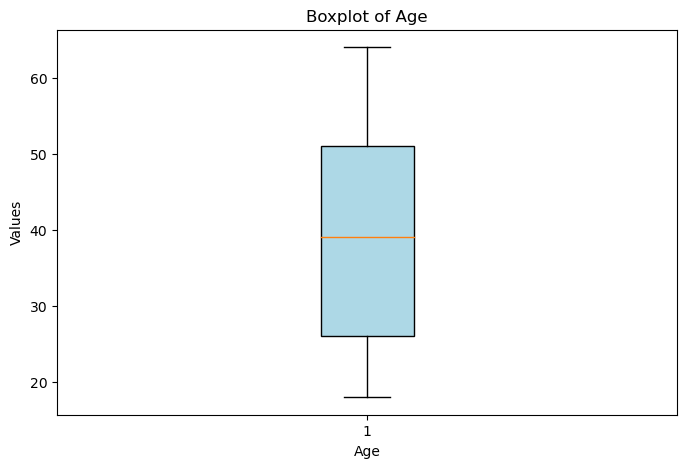

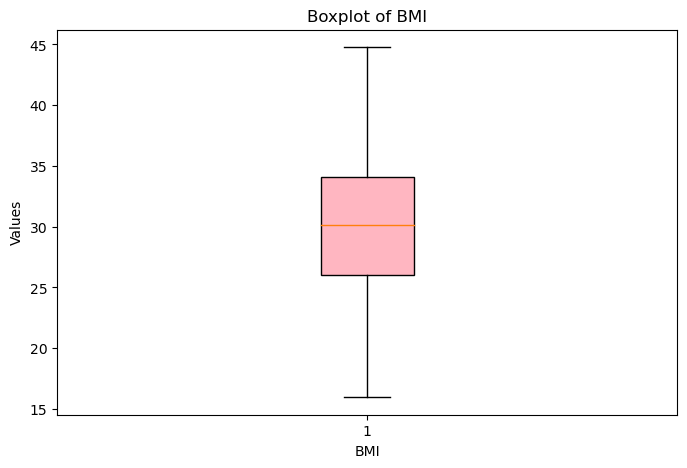

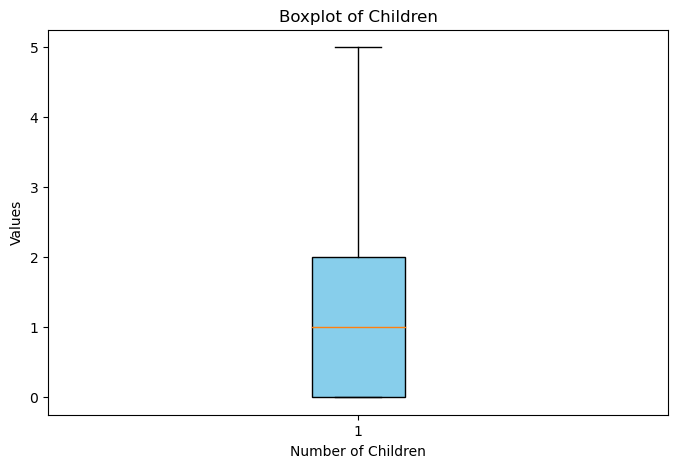

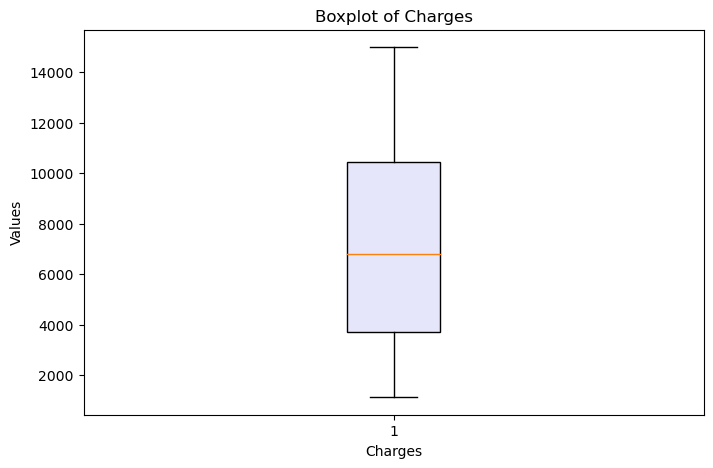

In [17]:
create_boxplot(df_filtered, 'age', title='Boxplot of Age', xlabel='Age', ylabel='Values', color='lightblue')
create_boxplot(df_filtered, 'bmi', title='Boxplot of BMI', xlabel='BMI', ylabel='Values', color='lightpink')
create_boxplot(df_filtered, 'children', title='Boxplot of Children', xlabel='Number of Children', ylabel='Values', color='skyblue')
create_boxplot(df_filtered, 'charges', title='Boxplot of Charges', xlabel='Charges', ylabel='Values', color='lavender')

In [18]:
create_barplot_single(df_filtered, 'sex', title='Bar Plot of Sex', xlabel='Sex', ylabel='Count', color='lightblue')
create_barplot_single(df_filtered, 'smoker', title='Bar Plot of Smoker', xlabel='Smoker', ylabel='Count', color='thistle')
create_barplot_single(df_filtered, 'region', title='Bar Plot of Region', xlabel='Region', ylabel='Count', color='lightpink')

In [19]:
custom_colors = ['lightpink', 'lightblue', 'lavender',  'skyblue']  

create_piechart(df_filtered, 'sex', title='Pie Chart of Sex', colors=custom_colors)
create_piechart(df_filtered, 'smoker', title='Pie Chart of Smoker', colors=custom_colors)
create_piechart(df_filtered, 'region', title='Pie Chart of Region', colors=custom_colors)

In [20]:
create_violinplot_single(df_filtered, 'age', title='Violin Plot of Age', xlabel='Age', ylabel='Distribution', color='salmon')
create_violinplot_single(df_filtered, 'bmi', title='Violin Plot of BMI', xlabel='BMI', ylabel='Distribution',color='cornflowerblue')
create_violinplot_single(df_filtered, 'children', title='Violin Plot of Children', xlabel='Number of Children', ylabel='Distribution',color='moccasin')
create_violinplot_single(df_filtered, 'charges', title='Violin Plot of Charges', xlabel='Charges', ylabel='Distribution',color='mediumaquamarine')

In [21]:
create_histogram(df_filtered, 'age', title='Histogram of Age', xlabel='Age', ylabel='Frequency',color='salmon')
create_histogram(df_filtered, 'bmi', title='Histogram of BMI', xlabel='BMI', ylabel='Frequency',color='cornflowerblue')
create_histogram(df_filtered, 'children', title='Histogram of Children', xlabel='Number of Children', ylabel='Frequency',color='moccasin')
create_histogram(df_filtered, 'charges', title='Histogram of Charges', xlabel='Charges', ylabel='Frequency',color='mediumaquamarine')

<h1><mark>Relation between charges and other features</mark></h1>

In [22]:
def create_boxplot_two_cols(dataframe, x_col, y_col, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dataframe[x_col], y=dataframe[y_col])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if x_col == 'sex':
        plt.legend(title='Sex', labels={'female': '0', 'male': '1'})
    elif x_col == 'smoker':
        plt.legend(title='Smoker', labels={'no': '0', 'yes': '1'})
    plt.show()

def create_violinplot(dataframe, x_col, y_col, title=None, xlabel=None, ylabel=None, color='blue'):
    fig = px.violin(dataframe, x=x_col, y=y_col, 
                    title=title, labels={x_col: xlabel, y_col: ylabel})
    fig.update_traces(marker_color=color, selector=dict(type='violin'))
    fig.update_layout(width=800, height=500)
    fig.show()

def create_barplot(dataframe, x_col, y_col, title=None, xlabel=None, ylabel=None, color='blue'):
    fig = px.bar(dataframe, x=x_col, y=y_col, color_discrete_sequence=[color],
                    title=title, labels={x_col: xlabel, y_col: ylabel})
    fig.update_layout(width=800, height=500)
    fig.show()

def scatter_with_ols_trendline(data, x_col, y_col, color_col=None, color_continuous_scale=None):
    title = f"{y_col.capitalize()} vs. {x_col.capitalize()}"
    fig = px.scatter(data, x=x_col, y=y_col, trendline="ols",
                     title=title,
                     labels={x_col: x_col.capitalize(), y_col: y_col.capitalize()},
                     color=color_col, 
                     color_continuous_scale=color_continuous_scale,
                     color_continuous_midpoint=data[y_col].mean () if color_col else None
                    )

    fig.update_traces(line=dict(color="black"))
    return fig

In [23]:
df_filtered['sex'] = df_filtered['sex'].replace({'female': 0, 'male': 1})

df_filtered['smoker'] = df_filtered['smoker'].replace({'no': 0, 'yes': 1})

In [24]:
scatter_with_ols_trendline(df_filtered, x_col="age", y_col="charges", color_col="charges", color_continuous_scale="inferno").show()
scatter_with_ols_trendline(df_filtered, x_col="sex", y_col="charges", color_col="charges", color_continuous_scale="YlGnBu").show()
scatter_with_ols_trendline(df_filtered, x_col="bmi", y_col="charges", color_col="charges", color_continuous_scale="RdBu").show()
scatter_with_ols_trendline(df_filtered, x_col="children", y_col="charges", color_col="charges", color_continuous_scale="Blackbody").show()
scatter_with_ols_trendline(df_filtered, x_col="smoker", y_col="charges", color_col="charges", color_continuous_scale="purd").show()

In [25]:
create_barplot(df_filtered, 'sex', 'charges', title='Bar Plot of Sex vs. Charges', xlabel='Sex', ylabel='Charges', color ='orange')
create_barplot(df_filtered, 'smoker', 'charges', title='Bar Plot of Smoker vs. Charges', xlabel='Smoker', ylabel='Charges', color ='tomato')
create_barplot(df_filtered, 'region', 'charges', title='Bar Plot of Region vs. Charges', xlabel='Region', ylabel='Charges', color ='lightpink')

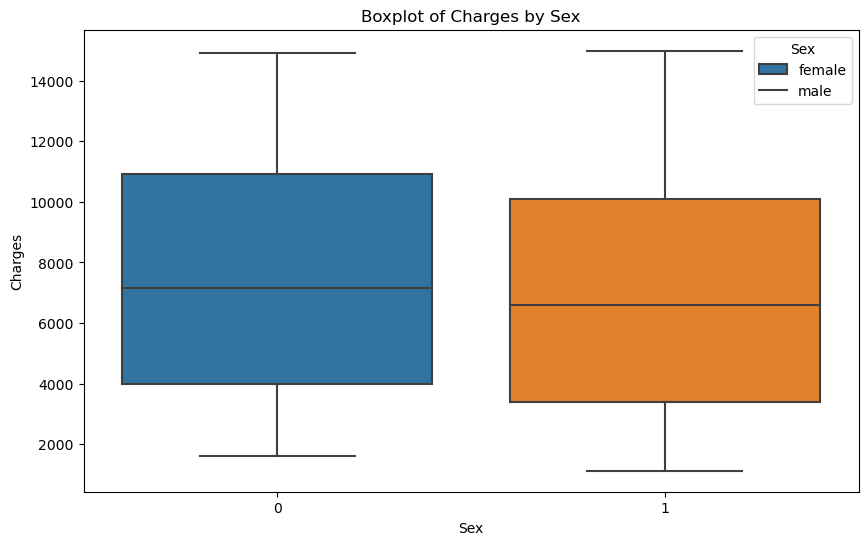

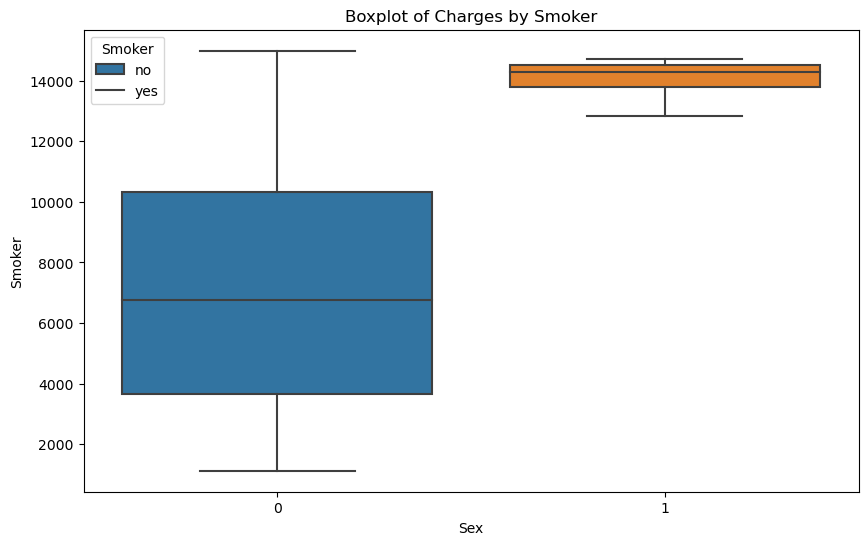

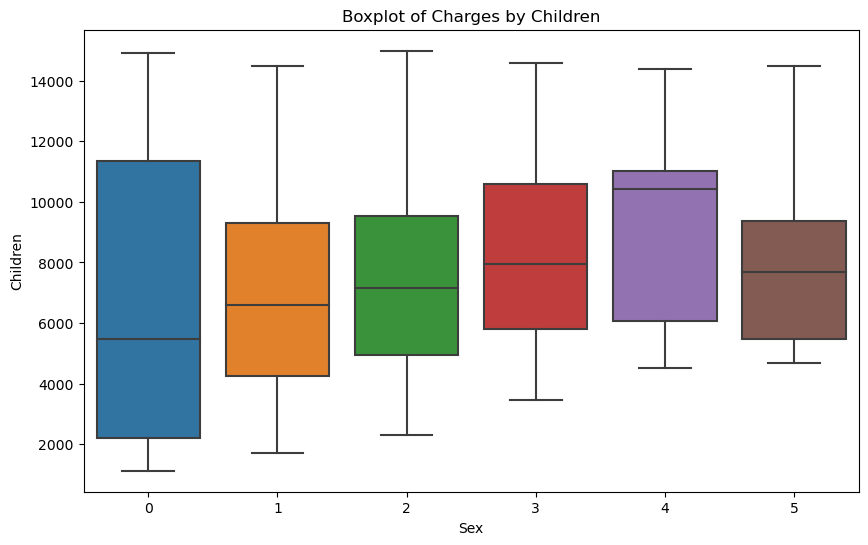

In [26]:
create_boxplot_two_cols(df_filtered, 'sex', 'charges', title='Boxplot of Charges by Sex', xlabel='Sex', ylabel='Charges')
create_boxplot_two_cols(df_filtered, 'smoker', 'charges', title='Boxplot of Charges by Smoker', xlabel='Sex', ylabel='Smoker')
create_boxplot_two_cols(df_filtered, 'children', 'charges', title='Boxplot of Charges by Children', xlabel='Sex', ylabel='Children')

In [27]:
create_violinplot(df_filtered, 'age', 'charges', title='Violin Plot of Age vs. Charges', xlabel='Age', ylabel='Charges', color='peru')
create_violinplot(df_filtered, 'bmi', 'charges', title='Violin Plot of BMI vs. Charges', xlabel='BMI', ylabel='Charges',color='plum')
create_violinplot(df_filtered, 'children', 'charges', title='Violin Plot of Children vs. Charges', xlabel='Number of Children', ylabel='Charges',color='navy')

In [28]:
def create_interactive_pairplot(dataframe, hue=None, palette=None):
    dimensions = list(dataframe.columns)
    if hue is not None:
        dimensions.remove(hue)
    
    hover_text = []
    for index, row in dataframe.iterrows():
        text = f'<b>Point {index}</b><br>'
        for col in dataframe.columns:
            text += f'<b>{col}</b>: {row[col]}<br>'
        hover_text.append(text)
    
    fig = go.Figure(data=go.Splom(
        dimensions=[dict(label=dim, values=dataframe[dim]) for dim in dimensions],
        marker=dict(color=dataframe[hue] if hue else 'blue', colorscale=palette),
        text=hover_text,
        hoverinfo='text'
    ))

    fig.update_layout(
        title="Interactive Pair Plot",
        dragmode='select',
        width=1400,
        height=1400,
    )

    fig.show()

In [29]:
custom_palette = [[0, "salmon"], [1, "darkred"]]
create_interactive_pairplot(df_filtered, hue='smoker', palette=custom_palette)

In [30]:
custom_palette = [[0, "pink"], [1, "blue"]]
create_interactive_pairplot(df_filtered, hue='sex', palette=custom_palette)

In [31]:
data = df_filtered  

fig = make_subplots(rows=1, cols=2, subplot_titles=('Heatmap without Charges', 'Heatmap for Charges'))

if isinstance(data, pd.DataFrame):
    # Create heatmap for all data without the last column
    z_values1 = data.iloc[:, :-1].values
    x_values1 = data.columns[:-1]
    y_values1 = data.index

    # Create heatmap for the last column
    z_values2 = data.iloc[:, -1].values.reshape(-1, 1)
    x_values2 = ['Last Column']
    y_values2 = data.index

# Add subplots with titles
fig.add_trace(
    go.Heatmap(z=z_values1, x=x_values1, y=y_values1, colorscale='oryel', customdata=z_values1, hovertemplate='<b>Column:</b> %{x}<br><b>Index:</b> %{y}<br><b>Value:</b> %{customdata}'),
    row=1, col=1
)
fig.add_trace(
    go.Heatmap(z=z_values2, x=x_values2, y=y_values2, colorscale='oryel', customdata=z_values2, hovertemplate='<b>Column:</b> %{x}<br><b>Index:</b> %{y}<br><b>Value:</b> %{customdata}'),
    row=1, col=2
)

fig.update_xaxes(title_text='Column', row=1, col=1)
fig.update_yaxes(title_text='Index', row=1, col=1)
fig.update_xaxes(title_text='Column', row=1, col=2)
fig.update_yaxes(title_text='Index', row=1, col=2)

fig.update_layout(title_text="Heatmap Subplots", width=1100, height=600)
fig.show()

<h1><mark>Display relations between charges and other columns</mark></h1>

<Axes: xlabel='age', ylabel='charges'>

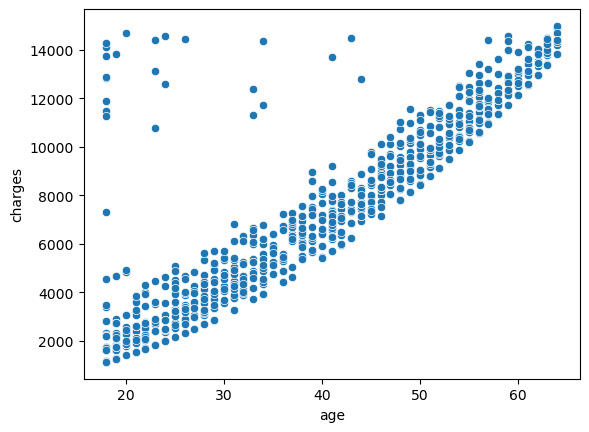

In [32]:
sns.scatterplot(df_filtered, x= 'age', y= 'charges')

<Axes: xlabel='bmi', ylabel='charges'>

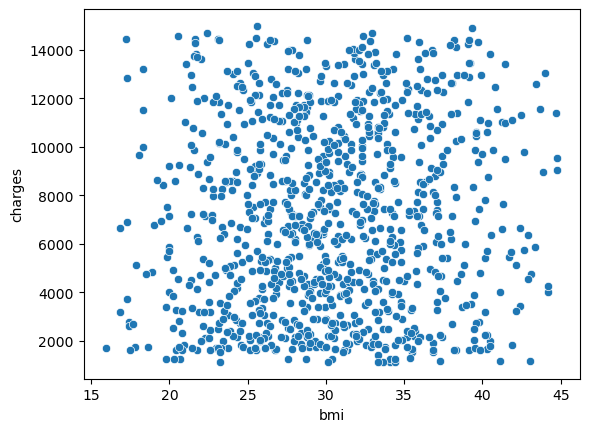

In [33]:
sns.scatterplot(df_filtered, x= 'bmi', y= 'charges')

<Axes: xlabel='smoker', ylabel='charges'>

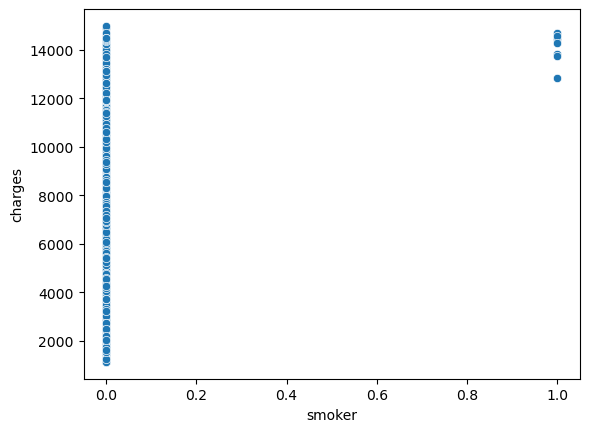

In [34]:
sns.scatterplot(df_filtered, x= 'smoker', y= 'charges')

<Axes: xlabel='bmi', ylabel='charges'>

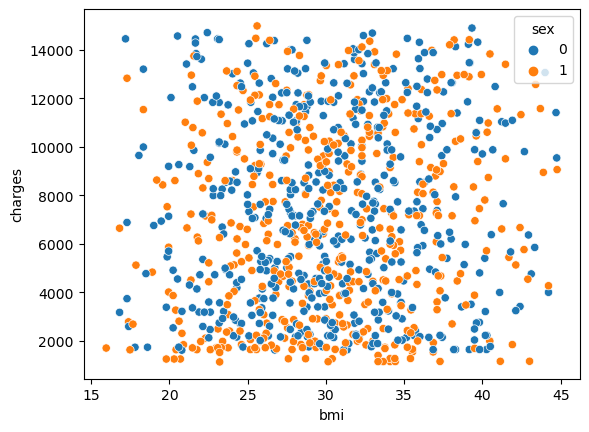

In [35]:
sns.scatterplot(df_filtered, x= 'bmi', y= 'charges', hue = df_filtered['sex'])

In [36]:
df_filtered.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [37]:
df_filtered.head()

age  sex    bmi  children  smoker     region    charges
1   18    1  33.77         1       0  southeast  1725.5523
2   28    1  33.00         3       0  southeast  4449.4620
4   32    1  28.88         0       0  northwest  3866.8552
5   31    0  25.74         0       0  southeast  3756.6216
6   46    0  33.44         1       0  southeast  8240.5896

In [38]:
df_filtered['sex'] = df_filtered['sex'].astype('category')
df_filtered['sex']  = df_filtered['sex'].cat.codes

df_filtered['smoker'] = df_filtered['smoker'].astype('category')
df_filtered['smoker']  = df_filtered['smoker'].cat.codes

df_filtered['region'] = df_filtered['region'].astype('category')
df_filtered['region']  = df_filtered['region'].cat.codes

In [39]:
df_filtered.head()

age  sex    bmi  children  smoker  region    charges
1   18    1  33.77         1       0       2  1725.5523
2   28    1  33.00         3       0       2  4449.4620
4   32    1  28.88         0       0       1  3866.8552
5   31    0  25.74         0       0       2  3756.6216
6   46    0  33.44         1       0       2  8240.5896

<h1><mark>Linear Regression</mark></h1>

In [40]:
len(df_filtered)

965

In [41]:
DF_train = df_filtered.iloc[:850, :]

y_train = DF_train['charges']
DF_test = df_filtered.iloc[850:, :]
X_test = DF_test.drop('charges', axis = 1)
y_test = DF_test['charges']

In [42]:
mlr = smf.ols(formula='charges ~ age + sex + bmi + children + smoker + region', data= DF_train ).fit()

In [43]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1487.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        20:19:36   Log-Likelihood:                -7191.1
No. Observations:                 850   AIC:                         1.440e+04
Df Residuals:                     843   BIC:                         1.443e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3063.6240    238.101    -12.867      0.000   -3530.964   -2596.284
age          257.9315      2.827     91.246      0.000     252.383     263.480
sex         -444.7856     78.850     -5.641      0.000    -599.551    -290.020
bmi            5.0787      7.011      0.724      0.469      -8.683      18.841
children     408.8247     32.388     12.623      0.000     345.254     472.396
smoker      1.163e+04    478.298     24.316      0.000    1.07e+04    1.26e+04
region      -210.0705     35.567     -5.906      0.000    -279.880    -140.261
==============================================================================
Omnibus:                     1062.498   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114576.637
Skew:                           6.467   Prob(JB):                         0.00
Kurtosis:                      58.388   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
A_O_V= sm.stats.anova_lm(mlr,typ=1) # if we want a column of mean_sq ,change typ = 1
A_O_V

df        sum_sq       mean_sq            F         PR(>F)
age         1.0  1.065313e+10  1.065313e+10  8090.957171   0.000000e+00
sex         1.0  5.053366e+07  5.053366e+07    38.379872   9.096090e-10
bmi         1.0  1.779515e+07  1.779515e+07    13.515259   2.516077e-04
children    1.0  1.842655e+08  1.842655e+08   139.948028   5.544087e-30
smoker      1.0  7.967822e+08  7.967822e+08   605.149068  3.812323e-101
region      1.0  4.593213e+07  4.593213e+07    34.885046   5.070035e-09
Residual  843.0  1.109954e+09  1.316671e+06          NaN            NaN

In [45]:
SSR = A_O_V['sum_sq']['age'] + A_O_V['sum_sq']['sex'] + A_O_V['sum_sq']['bmi'] + A_O_V['sum_sq']['children'] + A_O_V['sum_sq']['smoker'] + A_O_V['sum_sq']['region']
SSE = A_O_V['sum_sq']['Residual'] 
SST = SSE + SSR

# Calculate degrees of freedom
n = len(DF_train)  # Number of observations # 700
p = len(mlr.params) - 1  # Number of predictors (excluding intercept)

# Calculate MSE 
MSE = A_O_V['sum_sq']['Residual'] / A_O_V['df']['Residual']


print(f"SSR = {SSR}" )
print(f"SSE = {SSE}" )
print(f"SST = {SST}" )
print(f"MSE = {MSE}" )

SSR = 11748437268.717402
SSE = 1109953645.3136747
SST = 12858390914.031076
MSE = 1316670.9908821764


In [46]:
lrbmi = smf.ols(formula='charges ~ age + sex + children + smoker + region', data= df_filtered ).fit()
anova = sm.stats.anova_lm(lrbmi, mlr, test = 'F', typ = 'I')

In [47]:
print(anova)

   df_resid           ssr  df_diff       ss_diff         F        Pr(>F)
0     959.0  1.611240e+09      0.0           NaN       NaN           NaN
1     843.0  1.109954e+09    116.0  5.012860e+08  3.282089  4.609538e-23


In [48]:
pred_train = mlr.predict(DF_train)

In [49]:
r2_score(y_train, pred_train)

0.9136786513386763

<Axes: ylabel='charges'>

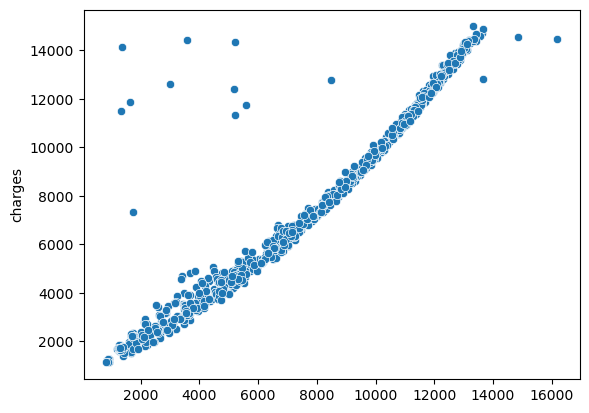

In [50]:
sns.scatterplot(x= pred_train, y= y_train)

In [51]:
pred_test = mlr.predict(X_test)

In [52]:
r2_score(y_test , pred_test)

0.6885965837126329

<Axes: ylabel='charges'>

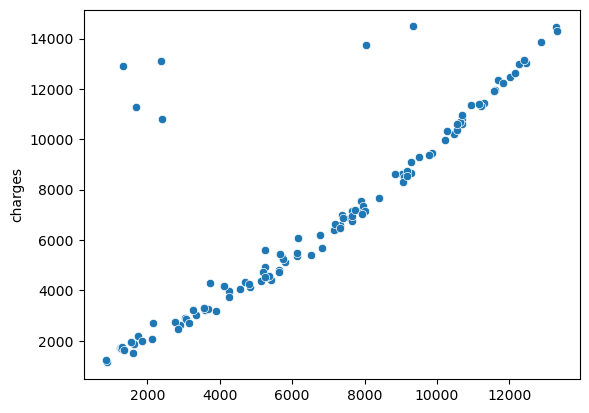

In [53]:
sns.scatterplot(x= pred_test, y= y_test)

<h1><mark>Partial F-test</mark></h1>

In [54]:
# H0 : age = 0
# Ha : age != 0

hypotheses_age = '(age = 0)'

f_test_age = mlr.f_test(hypotheses_age)

print(f_test_age)
print(np.round(f_test_age.pvalue, 2))

# reject H0

<F test: F=8325.757085029776, p=0.0, df_denom=843, df_num=1>
0.0


In [55]:
# H0 : sex = 0
# Ha : sex != 0

hypotheses_sex = '(sex = 0)'

f_test_sex = mlr.f_test(hypotheses_sex)

print(f_test_sex)
print(np.round(f_test_sex.pvalue, 2))

# reject H0

<F test: F=31.819915224762905, p=2.3090174312066525e-08, df_denom=843, df_num=1>
0.0


In [56]:
# H0 : bmi = 0
# Ha : bmi != 0

hypotheses_bmi = '(bmi = 0)'

f_test_bmi = mlr.f_test(hypotheses_bmi)
print(f_test_bmi)
print(np.round(f_test_bmi.pvalue, 2))

# fail to reject H0

<F test: F=0.5246838164415759, p=0.46905148652739037, df_denom=843, df_num=1>
0.47


In [57]:
# H0 : children = 0
# Ha : children != 0

hypotheses_child = '(children = 0)'

f_test_child = mlr.f_test(hypotheses_child)

print(f_test_child)
print(np.round(f_test_child.pvalue, 2))

# reject H0

<F test: F=159.33215524461588, p=1.3979135123525882e-33, df_denom=843, df_num=1>
0.0


In [58]:
# H0 : smoker = 0
# Ha : smoker != 0

hypotheses_smoker = '(smoker = 0)'

f_test_somker = mlr.f_test(hypotheses_smoker)

print(f_test_somker)
print(np.round(f_test_somker.pvalue, 2))

# reject H0

<F test: F=591.2897783313138, p=2.2103140796178905e-99, df_denom=843, df_num=1>
0.0


In [59]:
# H0 : region = 0
# Ha : region != 0

hypotheses_reg = '(region = 0)'

f_test_reg = mlr.f_test(hypotheses_reg)

print(f_test_reg)
print(np.round(f_test_reg.pvalue, 2))

# reject H0

<F test: F=34.885045678326804, p=5.070034617134692e-09, df_denom=843, df_num=1>
0.0


<h1><mark>Model without 'bmi'</mark></h1>

In [60]:
DF_train_with_out_bmi = DF_train.drop('bmi', axis=1)

In [61]:
model_with_out_bmi = smf.ols(formula='charges ~ age + sex +children + smoker + region', data= DF_train_with_out_bmi ).fit()

In [62]:
model_with_out_bmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1785.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        20:19:37   Log-Likelihood:                -7191.4
No. Observations:                 850   AIC:                         1.439e+04
Df Residuals:                     844   BIC:                         1.442e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2923.7919    139.337    -20.984      0.000   -3197.279   -2650.305
age          258.1655      2.807     91.957      0.000     252.655     263.676
sex         -444.3591     78.826     -5.637      0.000    -599.076    -289.642
children     408.4381     32.375     12.616      0.000     344.894     471.982
smoker      1.159e+04    474.125     24.436      0.000    1.07e+04    1.25e+04
region      -206.3230     35.179     -5.865      0.000    -275.371    -137.275
==============================================================================
Omnibus:                     1063.086   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114822.487
Skew:                           6.473   Prob(JB):                         0.00
Kurtosis:                      58.448   Cond. No.                         502.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
A_O_V= sm.stats.anova_lm(model_with_out_bmi,typ=1) # if we want a column of mean_sq ,change typ = 1
A_O_V

df        sum_sq       mean_sq            F         PR(>F)
age         1.0  1.065313e+10  1.065313e+10  8095.516329   0.000000e+00
sex         1.0  5.053366e+07  5.053366e+07    38.401498   8.995570e-10
children    1.0  1.854019e+08  1.854019e+08   140.890434   3.670127e-30
smoker      1.0  8.134166e+08  8.134166e+08   618.130816  8.264531e-103
region      1.0  4.526573e+07  4.526573e+07    34.398298   6.443617e-09
Residual  844.0  1.110644e+09  1.315929e+06          NaN            NaN

In [64]:
SSR = A_O_V['sum_sq']['age'] + A_O_V['sum_sq']['sex'] + A_O_V['sum_sq']['children'] + A_O_V['sum_sq']['smoker'] + A_O_V['sum_sq']['region']
SSE = A_O_V['sum_sq']['Residual'] 
SST = SSE + SSR

# Calculate degrees of freedom
n = len(DF_train)  # Number of observations # 700
p = len(model_with_out_bmi.params) - 1  # Number of predictors (excluding intercept)

# Calculate MSE 
MSE = A_O_V['sum_sq']['Residual'] / A_O_V['df']['Residual']


print(f"SSR = {SSR}" )
print(f"SSE = {SSE}" )
print(f"SST = {SST}" )
print(f"MSE = {MSE}" )

SSR = 11747746432.75691
SSE = 1110644481.2741685
SST = 12858390914.031078
MSE = 1315929.480182664


In [65]:
model_with_out_bmi.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.913     
Dependent Variable: charges          AIC:                14394.7200
Date:               2024-05-10 20:19 BIC:                14423.1914
No. Observations:   850              Log-Likelihood:     -7191.4   
Df Model:           5                F-statistic:        1785.     
Df Residuals:       844              Prob (F-statistic): 0.00      
R-squared:          0.914            Scale:              1.3159e+06
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -2923.7919 139.3366 -20.9837 0.0000 -3197.2788 -2650.3050
age         258.1655   2.8075  91.9566 0.0000   252.6551   263.6760
sex        -444.3591  78.8255  -5.6372 0.0000  -599.0761  -289.6420
children    408.4381  32.3746  12.6160 0.0000   344.8940   471.9822
smoker    11585.5713 474.1247  24.4357 0.0000 10654.9694 12516.1732
region     -206.3230  35.1786  -5.8650 0.0000  -275.3709  -137.2751
-------------------------------------------------------------------
Omnibus:            1063.086      Durbin-Watson:         1.872     
Prob(Omnibus):      0.000         Jarque-Bera (JB):      114822.487
Skew:               6.473         Prob(JB):              0.000     
Kurtosis:           58.448        Condition No.:         502       
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

In [66]:
pred_train_bmi = model_with_out_bmi.predict(DF_train)

In [67]:
len(pred_train_bmi)

850

In [68]:
len(df_filtered)

965

In [69]:
r2_score(y_train, pred_train_bmi)

0.9136249248681472

In [70]:
pred_test_bmi = model_with_out_bmi.predict(X_test)

In [71]:
r2_score(y_test, pred_test_bmi)

0.6881889457095568

In [72]:
res = mlr.resid

In [73]:
res

1       431.002512
2      -238.141964
4      -815.146850
5      -886.216858
6      -719.152609
           ...    
1172    -79.626531
1173   -591.327224
1174   -308.345283
1175     36.069746
1177   -674.521140
Length: 850, dtype: float64

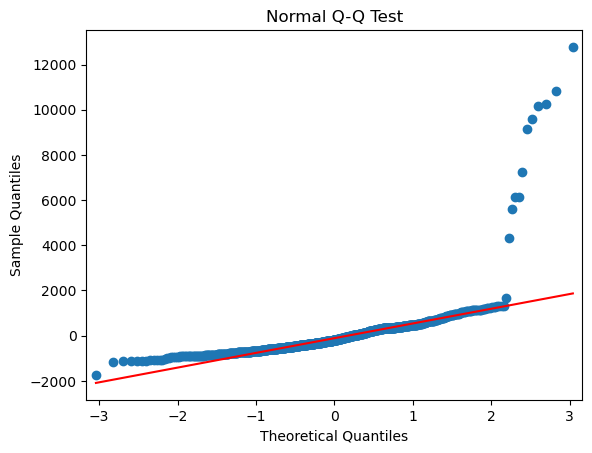

In [74]:
fig = sm.qqplot(data=res, line= 'q', dist= st.norm)
plt.title('Normal Q-Q Test')
plt.show()

In [75]:
coef = model_with_out_bmi.params

In [76]:
coef

Intercept    -2923.791900
age            258.165546
sex           -444.359053
children       408.438092
smoker       11585.571313
region        -206.322962
dtype: float64

<h1><mark>Predection Function</mark></h1>

In [77]:
DF_train_with_out_bmi.loc[DF_train_with_out_bmi['smoker'] == 1]

age  sex  children  smoker  region      charges
64     20    0         0       1       1  14711.74380
250    18    1         2       1       0  12829.45510
362    19    0         0       1       3  13844.50600
412    26    0         2       1       0  14455.64405
989    24    0         0       1       0  14571.89080
1033   18    1         0       1       0  13747.87235

In [78]:
len(df.loc[df['smoker'] == 'yes']), len(df.loc[df['smoker'] == 'no'])

(274, 1064)

In [79]:
len(df_filtered.loc[df_filtered['smoker'] == 1]), len(df_filtered.loc[df_filtered['smoker'] == 0])

(7, 958)

In [80]:
len(DF_train.loc[DF_train['smoker'] == 1]), len(DF_train.loc[DF_train['smoker'] == 0])

(6, 844)

In [81]:
len(DF_test.loc[DF_test['smoker'] == 1]), len(DF_test.loc[DF_test['smoker'] == 0])

(1, 114)

In [82]:
def Predict():
    age = float(input('Enter Age:'))
    sex = float(input('Enter sex: '))
    children = float(input('Enter Number Of Childs:'))
    smoker = float(input('Are you a smoker? : '))
    region = float(input('Enter Region:'))
    charges = coef[0]+ coef[1]*age + coef[2]*sex + coef[3]*children + coef[4]*smoker + coef[5]*region
    print("The charges is", charges)

In [84]:
Predict()

The charges is 13582.846403192769


In [85]:
DF_train_with_out_bmi

age  sex  children  smoker  region     charges
1      18    1         1       0       2   1725.5523
2      28    1         3       0       2   4449.4620
4      32    1         0       0       1   3866.8552
5      31    0         0       0       2   3756.6216
6      46    0         1       0       2   8240.5896
...   ...  ...       ...     ...     ...         ...
1172   56    0         0       0       2  11093.6229
1173   38    1         2       0       1   6457.8434
1174   29    1         2       0       1   4433.9159
1175   22    0         0       0       3   2154.3610
1177   40    0         1       0       3   6496.8860

[850 rows x 6 columns]

# ********************************************************************************************

### ***Simple linear regression after cleaning and & accuracy = 80.2 %***
### ***The accuracy has increased from 8.9 % to 80.2 %***

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     3892.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        20:20:46   Log-Likelihood:                -8561.5
No. Observations:                 965   AIC:                         1.713e+04
Df Residuals:                     963   BIC:                         1.714e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2506.1807    163.856    -15.295      0.0

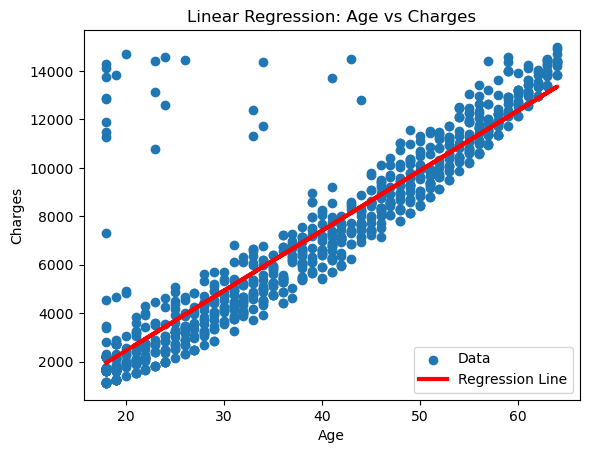

B0_hat: -2506.1806945646185
B1_hat: 247.71981119521283
Residuals: 1       -227.223607
2         19.487981
4      -1553.998064
5      -1416.511852
6       -648.341020
           ...     
1332    1036.435512
1333     720.738435
1334     253.204893
1335    -322.942407
1336    -687.990341
Length: 965, dtype: float64
Fitted Values: 1        1952.775907
2        4429.974019
4        5420.853264
5        5173.133452
6        8888.930620
            ...     
1332    10375.249488
1333     9879.809865
1334     1952.775907
1335     1952.775907
1336     2695.935341
Length: 965, dtype: float64
Confidence Interval for coefficients:
                 0            1
const -2827.736162 -2184.625227
age     239.927780   255.511842
Confidence Interval for fitted values:
[[1757.27904202 2148.27277187]
 [4292.10111413 4567.84692368]
 [5299.5067127  5542.19981466]
 ...
 [1757.27904202 2148.27277187]
 [1757.27904202 2148.27277187]
 [2519.35400655 2872.51667452]]


In [86]:
x=df_filtered['age']
y=df_filtered['charges']

# Filter out the FutureWarning related to Series.__getitem__ treating keys as positions
warnings.filterwarnings("ignore", message="Series.__getitem__ treating keys as positions is deprecated.")

# Add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print model summary
print(model.summary())

# Plot data and regression line
plt.scatter(df_filtered['age'], df_filtered['charges'], label='Data')
plt.plot(df_filtered['age'], model.predict(), color='red', label='Regression Line', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges')
plt.legend()
plt.show()

B0_hat = model.params[0]
B1_hat = model.params[1]
print("B0_hat:", B0_hat)
print("B1_hat:", B1_hat)

# Residuals
residuals = model.resid
print("Residuals:", residuals)

# Fitted values
fitted_values = model.fittedvalues
print("Fitted Values:", fitted_values)

# Confidence interval for coefficients
conf_int = model.conf_int(alpha=0.05)
print("Confidence Interval for coefficients:")
print(conf_int)

# Confidence interval for fitted values
pred_int = model.get_prediction().conf_int()
print("Confidence Interval for fitted values:")
print(pred_int)

#DF Residuals(difference between the number of observations and the number of parameters estimated.)
#DF Model(number of parameters estimated in the model, excluding the intercept.)
# age appears to have a significant positive effect on charges.
#the R-squared value is 0.802, indicating that approximately 80.2% 
#accept the model

In [87]:
# Calculate the degrees of freedom
df_regression = model.df_model
df_residual = model.df_resid

# Calculate the mean square regression and mean square error
ms_regression = model.mse_model
ms_residual = model.mse_resid

# Calculate the F-statistic
f_calc = ms_regression / ms_residual
print("F-calc:", f_calc)

# Choose the significance level (alpha)
alpha = 0.05

# Calculate the tabulated F-value
f_tabulated = st.f.ppf(alpha, df_regression, df_residual)

print("Tabulated F-value:", f_tabulated)

if f_calc > f_tabulated:
    print("Reject the null hypothesis; the regression model is statistically significant.")
else:
    print("Fail to reject the null hypothesis; the regression model is not statistically significant.")

F-calc: 3892.3210226562824
Tabulated F-value: 0.003934190174862686
Reject the null hypothesis; the regression model is statistically significant.


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     17.45
Date:                Fri, 10 May 2024   Prob (F-statistic):           3.22e-05
Time:                        20:20:46   Log-Likelihood:                -9333.4
No. Observations:                 965   AIC:                         1.867e+04
Df Residuals:                     963   BIC:                         1.868e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6662.6650    163.662     40.710      0.0

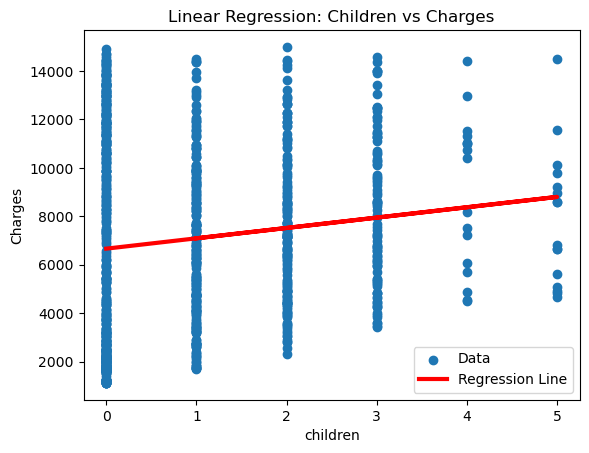

B0_hat: 6662.664978248894
B1_hat: 427.19661020654144
Residuals: 1      -5364.309288
2      -3494.792809
4      -2795.809778
5      -2906.043378
6       1150.728012
           ...     
1332    3467.430191
1333    2656.293491
1334   -4456.684178
1335   -5032.831478
1336   -4654.719978
Length: 965, dtype: float64
Fitted Values: 1       7089.861588
2       7944.254809
4       6662.664978
5       6662.664978
6       7089.861588
           ...     
1332    7944.254809
1333    7944.254809
1334    6662.664978
1335    6662.664978
1336    6662.664978
Length: 965, dtype: float64
Confidence Interval for coefficients:
                    0            1
const     6341.490359  6983.839598
children   226.486845   627.906375
Confidence Interval for fitted values:
[[6846.90451364 7332.81866327]
 [7483.29428288 8405.21533486]
 [6341.49035893 6983.83959757]
 ...
 [6341.49035893 6983.83959757]
 [6341.49035893 6983.83959757]
 [6341.49035893 6983.83959757]]
F-calc: 17.446452773380948
Tabulated F-value: 0.003

In [88]:
x1 = df_filtered['children']
y1 = df_filtered['charges']

warnings.filterwarnings("ignore", message="Series.__getitem__ treating keys as positions is deprecated.")

x1 = sm.add_constant(x1)

# Fit the linear regression model
model1 = sm.OLS(y1, x1).fit()

print(model1.summary())

# Plot data and regression line
plt.scatter(df_filtered['children'], df_filtered['charges'], label='Data')
plt.plot(df_filtered['children'], model1.predict(), color='red', label='Regression Line', linewidth=3)
plt.xlabel('children')
plt.ylabel('Charges')
plt.title('Linear Regression: Children vs Charges')
plt.legend()
plt.show()

B0_hat1 = model1.params[0]
B1_hat1 = model1.params[1]
print("B0_hat:", B0_hat1)
print("B1_hat:", B1_hat1)

# Residuals
residuals1 = model1.resid
print("Residuals:", residuals1)

# Fitted values
fitted_values1 = model1.fittedvalues
print("Fitted Values:", fitted_values1)

conf_int1 = model1.conf_int(alpha=0.05)
print("Confidence Interval for coefficients:")
print(conf_int1)

pred_int1 = model1.get_prediction().conf_int()
print("Confidence Interval for fitted values:")
print(pred_int1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

df_regression1 = model1.df_model
df_residual1 = model1.df_resid

ms_regression1 = model1.mse_model
ms_residual1 = model1.mse_resid

f_calc1 = ms_regression1 / ms_residual1
print("F-calc:", f_calc1)

alpha = 0.05

f_tabulated1 = st.f.ppf(alpha, df_regression1, df_residual1)

print("Tabulated F-value:", f_tabulated1)

if f_calc1 > f_tabulated1:
    print("Reject the null hypothesis; the regression model is statistically significant.")
else:
    print("Fail to reject the null hypothesis; the regression model is not statistically significant.")


### ***In fact, we here rejected the H0, but there is an important thing that the accuracy of this model is very weak compared to its age***

### ***and therefore it does affect it, but to a very small extent.***

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.022
Date:                Fri, 10 May 2024   Prob (F-statistic):             0.0143
Time:                        20:20:47   Log-Likelihood:                -9339.0
No. Observations:                 965   AIC:                         1.868e+04
Df Residuals:                     963   BIC:                         1.869e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5522.1452    659.012      8.379      0.0

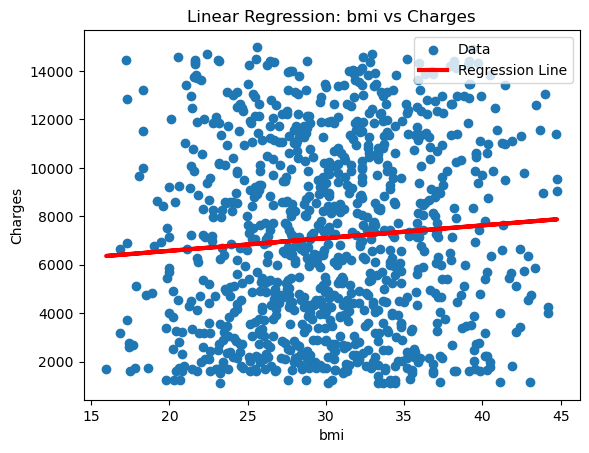

B0_hat: 6662.664978248894
B1_hat: 427.19661020654144
Residuals: 1      -5570.702195
2      -2806.340491
4      -3172.502806
5      -3117.776289
6        961.671678
           ...     
1332    3541.222199
1333    3451.391999
1334   -4993.083817
1335   -5828.229008
1336   -4869.604993
Length: 965, dtype: float64
Fitted Values: 1       7296.254495
2       7255.802491
4       7039.358006
5       6874.397889
6       7278.917922
           ...     
1332    7870.462801
1333    7149.156301
1334    7199.064617
1335    7458.062508
1336    6877.549993
Length: 965, dtype: float64
Confidence Interval for coefficients:
                 0            1
const  4228.879291  6815.411124
bmi      10.522299    94.547840
Confidence Interval for fitted values:
[[7010.31091865 7582.19807052]
 [6985.27536862 7526.32961396]
 [6788.6723078  7290.0437045 ]
 ...
 [6944.74408895 7453.38514415]
 [7087.91499555 7828.21001994]
 [6570.54107987 7184.55890611]]
F-calc: 6.021775012474567
Tabulated F-value: 0.0039341901748

In [89]:
x2 = df_filtered['bmi']

x2 = sm.add_constant(x2)

model2 = sm.OLS(y1, x2).fit()

print(model2.summary())

plt.scatter(df_filtered['bmi'], df_filtered['charges'], label='Data')
plt.plot(df_filtered['bmi'], model2.predict(), color='red', label='Regression Line', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.title('Linear Regression: bmi vs Charges')
plt.legend()
plt.show()

B0_hat2 = model1.params[0]
B1_hat2 = model1.params[1]
print("B0_hat:", B0_hat2)
print("B1_hat:", B1_hat2)

# Residuals
residuals2 = model2.resid
print("Residuals:", residuals2)

# Fitted values
fitted_values2 = model2.fittedvalues
print("Fitted Values:", fitted_values2)

conf_int2 = model2.conf_int(alpha=0.05)
print("Confidence Interval for coefficients:")
print(conf_int2)

pred_int2 = model2.get_prediction().conf_int()
print("Confidence Interval for fitted values:")
print(pred_int2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
df_regression2 = model2.df_model
df_residual2 = model2.df_resid

ms_regression2 = model2.mse_model
ms_residual2 = model2.mse_resid

f_calc2 = ms_regression2 / ms_residual2
print("F-calc:", f_calc2)

f_tabulated2 = st.f.ppf(alpha, df_regression2, df_residual2)

print("Tabulated F-value:", f_tabulated2)

if f_calc2 > f_tabulated2:
    print("Reject the null hypothesis; the regression model is statistically significant.")
else:
    print("Fail to reject the null hypothesis; the regression model is not statistically significant.")


### ***Same explanation as the children's model above***

<h1><mark>Lasso Model</mark></h1>

In [90]:
X = df_filtered.drop(columns=['charges']) 
y = df_filtered['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['age', 'bmi', 'children']  #  numerical feature
categorical_features = ['sex', 'smoker', 'region']  #categorical feature 

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  
        ('cat', categorical_transformer, categorical_features) 
    ])

lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', Lasso(alpha=0.1)) 
])

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = lasso_model.score(X_test, y_test)
print("R-squared:", r_squared)


encoded_feature_names = lasso_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_features)

coefficients = lasso_model.named_steps['regressor'].coef_

all_feature_names = numeric_features + list(encoded_feature_names)

for feature, coef in zip(all_feature_names, coefficients):
    print(f"{feature}: {coef}")

#Age, BMI, Children, Smoker (Yes): These features have non-zero coefficients, indicating that they are considered important predictors of charges by the Lasso model.
#Sex (Male), Region (Northwest, Southeast, Southwest): These features have coefficients close to zero, suggesting that they may not have significant predictive power or have been deemed less important by the Lasso model.

Mean Squared Error: 2490682.091097246
R-squared: 0.8370223918947751
age: 3578.0684847082102
bmi: 53.18034020870017
children: 461.2765619158261
sex_1: -452.2785232852395
smoker_1: 11903.858996706233
region_1: -377.734948503674
region_2: -796.2894513481906
region_3: -709.8510937539637


# ********************************************************************************************

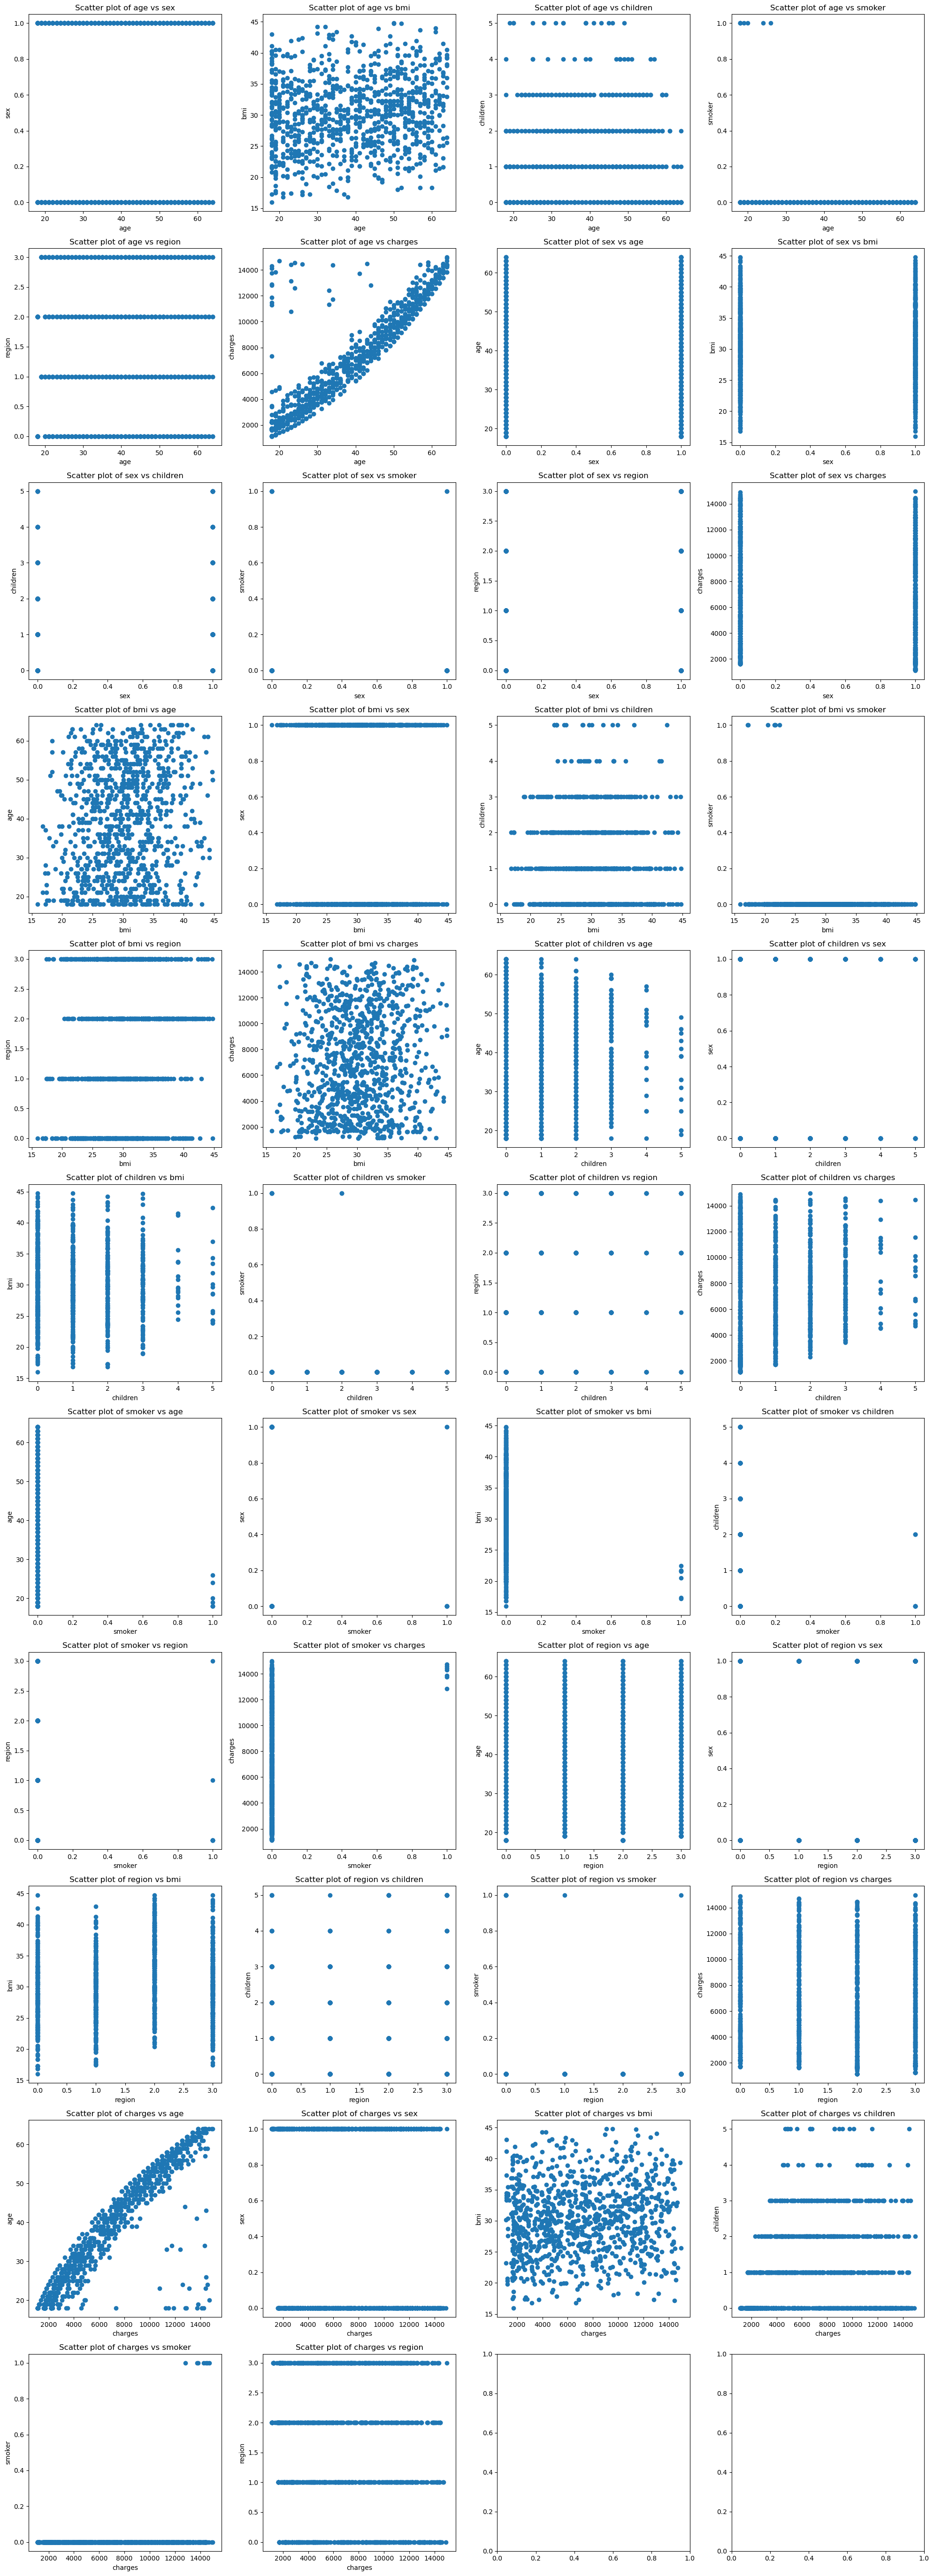

In [91]:
combos = list(permutations(df_filtered.columns, 2))
plots = len(combos)
cols = 4
rows = -(-plots // cols)  # Ceiling division to get the required number of rows

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

for i , pair in enumerate(combos):
    x, y = pair
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    ax.scatter(df_filtered[x], df_filtered[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'Scatter plot of {x} vs {y}')

plt.tight_layout()
plt.show()

In [92]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
alpha = 0.05

anova_results = []

for feature in features:
    model = smf.ols(f'charges ~ {feature}', data=df_filtered).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'].iloc[0]
    if p_value < alpha:
        significant = True
    else:
        significant = False
    
    anova_results.append({
        'Feature': feature,
        'F-value': anova_table['F'].iloc[0],
        'P-value': p_value,
        'Significant': significant,
        'model': model
    })

anova_results_df = pd.DataFrame(anova_results)

print(anova_results_df)

    Feature      F-value   P-value  Significant  \
0       age  3892.321023  0.000000         True   
1       sex     5.133313  0.023692         True   
2       bmi     6.021775  0.014307         True   
3  children    17.446453  0.000032         True   
4    smoker    23.220204  0.000002         True   
5    region     3.944010  0.047322         True   

                                               model  
0  <statsmodels.regression.linear_model.Regressio...  
1  <statsmodels.regression.linear_model.Regressio...  
2  <statsmodels.regression.linear_model.Regressio...  
3  <statsmodels.regression.linear_model.Regressio...  
4  <statsmodels.regression.linear_model.Regressio...  
5  <statsmodels.regression.linear_model.Regressio...  


In [93]:
#testing normality of errors
for i in range(6):
    resids=anova_results_df['model'][i].resid
    shapiro_test = st.shapiro(resids)
    print(True if shapiro_test.pvalue > 0.005 else False)

#they aren't normal but since our data is bigger than 30 rows, CLT should be applied to the dataset and could be considered normal.

False
False
False
False
False
False


In [94]:
#test linearity between age and charges

# Calculate Pearson correlation coefficient
pearson_corr, pearson_pval = st.pearsonr(df_filtered['age'], df_filtered['charges'])
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson correlation p-value:", pearson_pval)

# Calculate Spearman rank correlation coefficient
spearman_corr, spearman_pval = st.spearmanr(df_filtered['age'], df_filtered['charges'])
print("Spearman rank correlation coefficient:", spearman_corr)
print("Spearman rank correlation p-value:", spearman_pval)


Pearson correlation coefficient: 0.8953551811320131
Pearson correlation p-value: 0.0
Spearman rank correlation coefficient: 0.8996141159159049
Spearman rank correlation p-value: 0.0


In [95]:
#test indpendence of errors
# Durbin-Watson statistic

durbin_statistic = durbin_watson(anova_results_df['model'][0].resid)
print("Durbin-Watson Statistic:", durbin_statistic)
#since output is closer to 2, it means that there is independence of errors

Durbin-Watson Statistic: 1.976500400368507


In [96]:
#test for constant variance

exog_with_constant = sm.add_constant(df_filtered['age'])
bp_test = het_breuschpagan(anova_results_df['model'][0].resid, exog_with_constant)
print("Breusch-Pagan test p-value:", bp_test[1])
#(test failed)

Breusch-Pagan test p-value: 1.627370098441521e-07


In [97]:
X = df_filtered['age'] 
y = df_filtered['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

y_pred = model.predict(sm.add_constant(X_test))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

print(model.summary())

Mean Squared Error (MSE): 3357984.4918212695
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     3197.
Date:                Fri, 10 May 2024   Prob (F-statistic):          2.44e-276
Time:                        20:20:55   Log-Likelihood:                -6836.7
No. Observations:                 772   AIC:                         1.368e+04
Df Residuals:                     770   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [98]:
X = df_filtered[['age']] 
y = df_filtered['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3059532.5228434675
R-squared (R2): 0.7997997037536397


In [99]:
X = df_filtered.drop(columns=['charges','bmi']) 
y = df_filtered['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1677725.923796387
R-squared (R2): 0.8902181217370836
